Ваша задача этом соревновании - предсказать факт невыполнения кредитных обязательств в датасете test.csv. Вам будут даны два датасета: train.csv (содержит признаки и факт невыполнения кредитных обязательств) и test.csv (только признаки).

Целевая переменная

Credit Default - факт невыполнения кредитных обязательств

Метрика качества

F1-score (sklearn.metrics.f1_score)

Требования к решению

Целевая метрика

F1 > 0.5
Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту) Это четвертый вид усреднения(не микро не макро) байнери.

Описание датасета

Home Ownership - домовладение<br>
Annual Income - годовой доход<br>
Years in current job - количество лет на текущем месте работы<br>
Tax Liens - налоговые обременения<br>
Number of Open Accounts - количество открытых счетов<br>
Years of Credit History - количество лет кредитной истории<br>
Maximum Open Credit - наибольший открытый кредит<br>
Number of Credit Problems - количество проблем с кредитом<br>
Months since last delinquent - количество месяцев с последней просрочки платежа<br>
Bankruptcies - банкротства<br>
Purpose - цель кредита<br>
Term - срок кредита<br>
Current Loan Amount - текущая сумма кредита<br>
Current Credit Balance - текущий кредитный баланс<br>
Monthly Debt - ежемесячный долг<br>
Credit Score - баллы кредитного рейтинга<br>
Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)<br>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import random
from pathlib import Path

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import catboost as catb
from catboost import CatBoostRegressor

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from scipy.stats import shapiro
from scipy.stats import probplot # распределение на нормальность
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

In [5]:
import warnings
warnings.simplefilter('ignore')

In [6]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

In [15]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [16]:
#TRAIN_DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/SKLearn_Project_Classific/train.csv'
#TEST_DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/SKLearn_Project_Classific/test.csv'

**Загрузка данных**

In [17]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [18]:
df_train=df_train.rename(columns={'Home Ownership': 'Home_Ownership', 'Annual Income': 'Annual_Income', 'Years in current job': 'Years_in_current_job',
                         'Tax Liens': 'Tax_Liens', 'Number of Open Accounts': 'Number_of_Open_Accounts', 'Years of Credit History': 'Years_of_Credit_History', 
                         'Maximum Open Credit': 'Maximum_Open_Credit', 'Number of Credit Problems': 'Number_of_Credit_Problems', 'Months since last delinquent': 'Months_since_last_delinquent', 
                         'Current Loan Amount': 'Current_Loan_Amount', 'Current Credit Balance': 'Current_Credit_Balance', 'Monthly Debt': 'Monthly_Debt', 
                         'Credit Score': 'Credit_Score', 'Credit Default': 'Credit_Default'})

In [19]:
df_train.head()

,Home_Ownership,Annual_Income,Years_in_current_job,Tax_Liens,Number_of_Open_Accounts,Years_of_Credit_History,Maximum_Open_Credit,Number_of_Credit_Problems,Months_since_last_delinquent,Bankruptcies,Purpose,Term,Current_Loan_Amount,Current_Credit_Balance,Monthly_Debt,Credit_Score,Credit_Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [20]:
df_train.shape

(7500, 17)

In [21]:
df_train['Credit_Default'].value_counts()

0    5387
1    2113
Name: Credit_Default, dtype: int64

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home_Ownership                7500 non-null   object 
 1   Annual_Income                 5943 non-null   float64
 2   Years_in_current_job          7129 non-null   object 
 3   Tax_Liens                     7500 non-null   float64
 4   Number_of_Open_Accounts       7500 non-null   float64
 5   Years_of_Credit_History       7500 non-null   float64
 6   Maximum_Open_Credit           7500 non-null   float64
 7   Number_of_Credit_Problems     7500 non-null   float64
 8   Months_since_last_delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current_Loan_Amount           7500 non-null   float64
 13  Cur

In [23]:
df_test = pd.read_csv(TEST_DATASET_PATH)

In [24]:
df_test.shape

(2500, 16)

In [25]:
df_test=df_test.rename(columns={'Home Ownership': 'Home_Ownership', 'Annual Income': 'Annual_Income', 'Years in current job': 'Years_in_current_job',
                         'Tax Liens': 'Tax_Liens', 'Number of Open Accounts': 'Number_of_Open_Accounts', 'Years of Credit History': 'Years_of_Credit_History', 
                         'Maximum Open Credit': 'Maximum_Open_Credit', 'Number of Credit Problems': 'Number_of_Credit_Problems', 'Months since last delinquent': 'Months_since_last_delinquent', 
                         'Current Loan Amount': 'Current_Loan_Amount', 'Current Credit Balance': 'Current_Credit_Balance', 'Monthly Debt': 'Monthly_Debt', 
                         'Credit Score': 'Credit_Score'})

In [26]:
df_test.head()

,Home_Ownership,Annual_Income,Years_in_current_job,Tax_Liens,Number_of_Open_Accounts,Years_of_Credit_History,Maximum_Open_Credit,Number_of_Credit_Problems,Months_since_last_delinquent,Bankruptcies,Purpose,Term,Current_Loan_Amount,Current_Credit_Balance,Monthly_Debt,Credit_Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


## 1. **РАЗБОР ПЕРЕМЕННЫХ НА КАТЕГОРИИ**  <a class='anchor' id='eda'>

In [27]:
TARGET_NAME = 'Credit_Default'
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df_train.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()

**Целевая переменная**

In [28]:
df_train['Credit_Default'].value_counts()

0    5387
1    2113
Name: Credit_Default, dtype: int64

**Количественные переменные**

In [29]:
df_train.describe()

,Annual_Income,Tax_Liens,Number_of_Open_Accounts,Years_of_Credit_History,Maximum_Open_Credit,Number_of_Credit_Problems,Months_since_last_delinquent,Bankruptcies,Current_Loan_Amount,Current_Credit_Balance,Monthly_Debt,Credit_Score,Credit_Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [30]:
df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

['Annual_Income',
 'Tax_Liens',
 'Number_of_Open_Accounts',
 'Years_of_Credit_History',
 'Maximum_Open_Credit',
 'Number_of_Credit_Problems',
 'Months_since_last_delinquent',
 'Bankruptcies',
 'Current_Loan_Amount',
 'Current_Credit_Balance',
 'Monthly_Debt',
 'Credit_Score',
 'Credit_Default']

**Номинативные переменные**

In [31]:
df_train.select_dtypes(include='object').columns.tolist()

['Home_Ownership', 'Years_in_current_job', 'Purpose', 'Term']

In [32]:
df_train.Home_Ownership.value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home_Ownership, dtype: int64

In [33]:
df_train.Years_in_current_job.value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years_in_current_job, dtype: int64

In [34]:
df_train.Purpose.value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [35]:
df_train.Term.value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [36]:
NUM_FEATURE_NAMES = ['Annual_Income', 'Tax_Liens', 'Number_of_Open_Accounts', 'Years_of_Credit_History',
                    'Maximum_Open_Credit', 'Number_of_Credit_Problems', 'Months_since_last_delinquent',
                    'Bankruptcies', 'Current_Loan_Amount', 'Current_Credit_Balance', 'Monthly_Debt', 'Credit_Score'
                    ]

CAT_FEATURE_NAMES = ['Home_Ownership', 'Years_in_current_job', 'Purpose', 'Term']

SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + CAT_FEATURE_NAMES + NEW_FEATURE_NAMES

## 2. **Похожесть теста и трейна**  <a class='anchor' id='eda'>

Визуализирую признаки на трейне и тесте.

Annual_Income
MannwhitneyuResult(statistic=9362155.5, pvalue=0.45908193952511717)


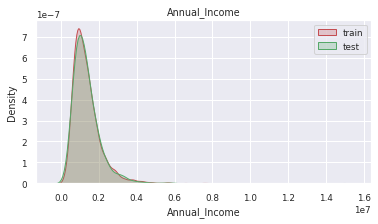

Tax_Liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


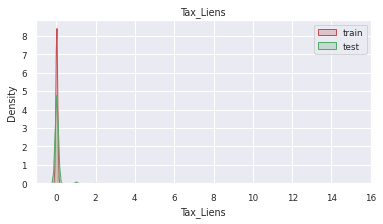

Number_of_Open_Accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


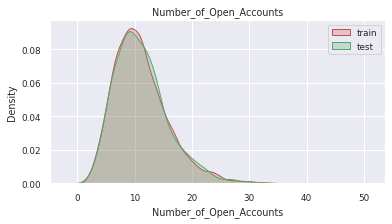

Years_of_Credit_History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


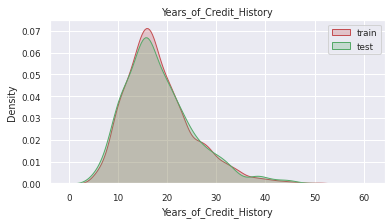

Maximum_Open_Credit
MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)


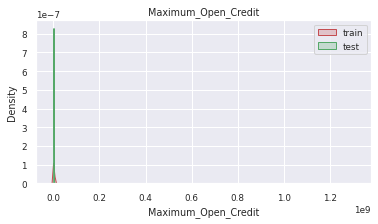

Number_of_Credit_Problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


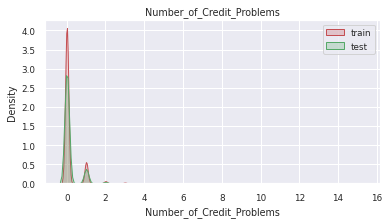

Months_since_last_delinquent
MannwhitneyuResult(statistic=6974400.5, pvalue=1.712573746209761e-82)


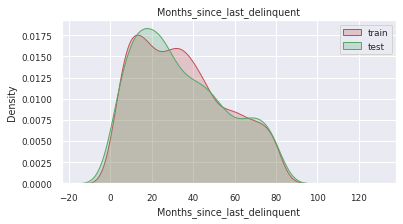

Bankruptcies
MannwhitneyuResult(statistic=9254231.0, pvalue=0.036681545859698156)


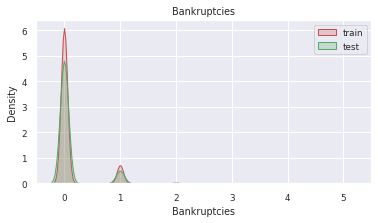

Current_Loan_Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


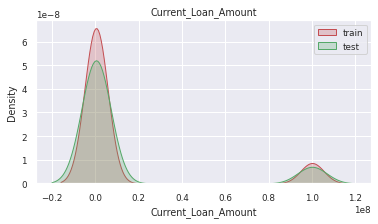

Current_Credit_Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


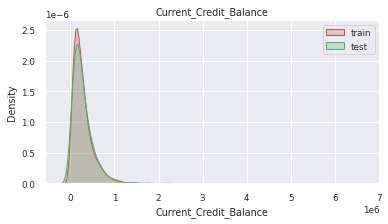

Monthly_Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


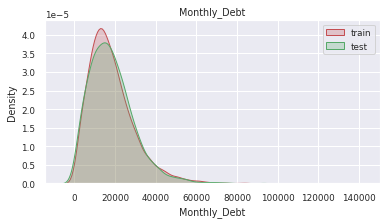

Credit_Score
MannwhitneyuResult(statistic=9359581.5, pvalue=0.45091647518794764)


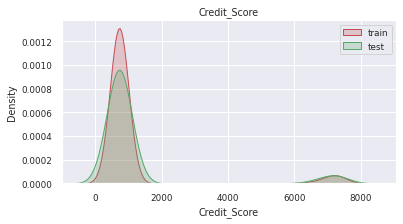

In [37]:
figsize = (6, 3)
for col in NUM_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(df_train[col], shade=True, label='train', color='r')
    sns.kdeplot(df_test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(df_train[col], df_test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

Методом Шапиро-Уилка проверяю на нормальность.Оценю эквивалентность мат. ожадиний трейна и теста, с помощью критерия Манна-Уитни и построю доверительные интервалы для средних значений, каждой из двух групп.

In [38]:
# Функция создания датафрейма для доверительных интервалов
def for_compare(X):
    For_compare = pd.DataFrame(df_train[X])
    For_compare['Is_train'] = 1
    For_compare2 = pd.DataFrame(df_test[X])
    For_compare2['Is_train'] = 0
    For_compare = pd.concat([For_compare, For_compare2], axis=0)

    return For_compare


In [39]:
df_train_med=df_train.fillna(value=df_train.median())

In [40]:
df_test_med=df_test.fillna(value=df_train.median())

**Annual_Income**

In [41]:
mannwhitneyu(df_train['Annual_Income'], df_test['Annual_Income'])

MannwhitneyuResult(statistic=9362155.5, pvalue=0.45908193952511717)

In [42]:
Annual_Income_for_compare = for_compare('Annual_Income')

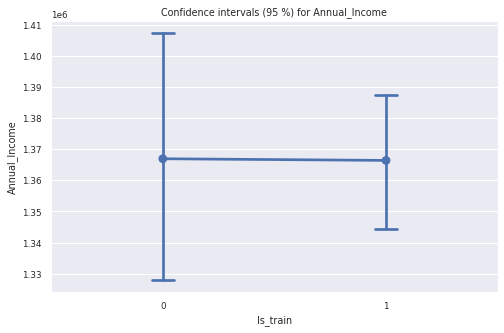

In [43]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Annual_Income', data=Annual_Income_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Annual_Income')
plt.show()

**Months_since_last_delinquent**

In [44]:
mannwhitneyu(df_train['Months_since_last_delinquent'], df_test['Months_since_last_delinquent'])

MannwhitneyuResult(statistic=6974400.5, pvalue=1.712573746209761e-82)

In [45]:
Months_since_last_delinquent_for_compare = for_compare('Months_since_last_delinquent')

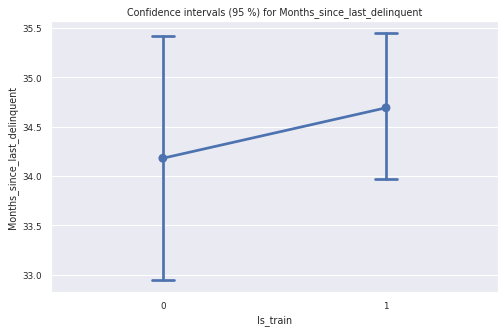

In [46]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Months_since_last_delinquent', data=Months_since_last_delinquent_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Months_since_last_delinquent')
plt.show()

**Credit_Score**

In [47]:
mannwhitneyu(df_train['Credit_Score'], df_test['Credit_Score'])

MannwhitneyuResult(statistic=9359581.5, pvalue=0.45091647518794764)

In [48]:
Credit_Score_for_compare = for_compare('Credit_Score')

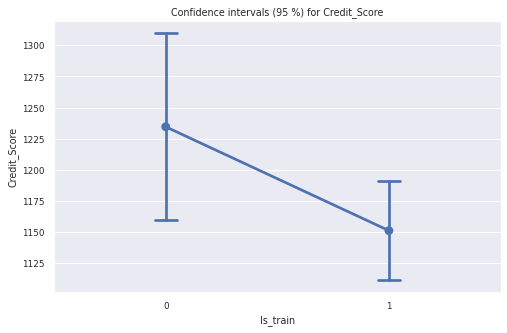

In [49]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Credit_Score', data=Credit_Score_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit_Score')
plt.show()

На kdeplot графики совпадают. Нужно оставить признак. 

**Tax_Liens**

In [50]:
shapiro(df_train['Tax_Liens'])

ShapiroResult(statistic=0.08825808763504028, pvalue=0.0)

In [51]:
shapiro(df_test['Tax_Liens'])

ShapiroResult(statistic=0.06182676553726196, pvalue=0.0)

In [52]:
mannwhitneyu(df_train['Tax_Liens'], df_test['Tax_Liens'])

MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)

In [53]:
Tax_Liens_for_compare = pd.DataFrame(df_train['Tax_Liens'])

In [54]:
Tax_Liens_for_compare['Is_train'] = 1

In [55]:
Tax_Liens_for_compare2 = pd.DataFrame(df_test['Tax_Liens'])

In [56]:
Tax_Liens_for_compare2['Is_train'] = 0

In [57]:
Tax_Liens_for_compare = pd.concat([Tax_Liens_for_compare, Tax_Liens_for_compare2], axis=0)

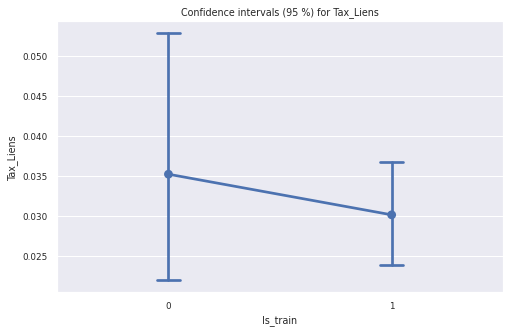

In [58]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Tax_Liens', data=Tax_Liens_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Tax_Liens')
plt.show()

**Number_of_Open_Accounts**

In [59]:
shapiro(df_train['Number_of_Open_Accounts'])

ShapiroResult(statistic=0.9372566342353821, pvalue=0.0)

In [60]:
shapiro(df_test['Number_of_Open_Accounts'])

ShapiroResult(statistic=0.9389863014221191, pvalue=6.676347118885071e-31)

In [61]:
mannwhitneyu(df_train['Number_of_Open_Accounts'], df_test['Number_of_Open_Accounts'])

MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)

In [62]:
Number_of_Open_Accounts_for_compare = for_compare('Number_of_Open_Accounts')

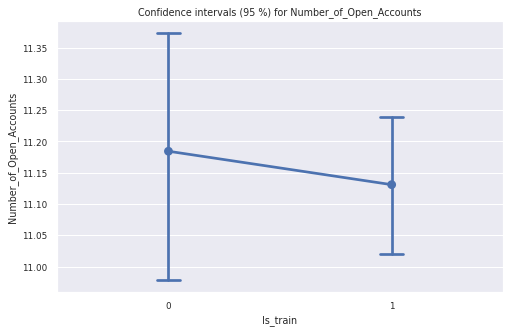

In [63]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Number_of_Open_Accounts', data=Number_of_Open_Accounts_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Number_of_Open_Accounts')
plt.show()

**Years_of_Credit_History**

In [64]:
shapiro(df_train['Years_of_Credit_History'])

ShapiroResult(statistic=0.9434478282928467, pvalue=0.0)

In [65]:
shapiro(df_test['Years_of_Credit_History'])

ShapiroResult(statistic=0.944594144821167, pvalue=1.1355419121372742e-29)

In [66]:
mannwhitneyu(df_train['Years_of_Credit_History'], df_test['Years_of_Credit_History'])

MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)

In [67]:
Years_of_Credit_History_for_compare = for_compare('Years_of_Credit_History')

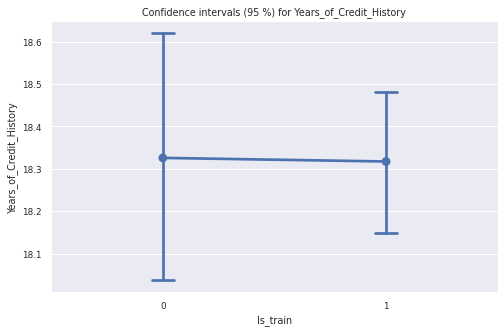

In [68]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Years_of_Credit_History', data=Years_of_Credit_History_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Years_of_Credit_History')
plt.show()

**Maximum_Open_Credit**

In [69]:
shapiro(df_train['Maximum_Open_Credit'])

ShapiroResult(statistic=0.010420262813568115, pvalue=0.0)

In [70]:
shapiro(df_test['Maximum_Open_Credit'])

ShapiroResult(statistic=0.22355026006698608, pvalue=0.0)

In [71]:
mannwhitneyu(df_train['Maximum_Open_Credit'], df_test['Maximum_Open_Credit'])

MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)

In [72]:
Maximum_Open_Credit_for_compare = for_compare('Maximum_Open_Credit')

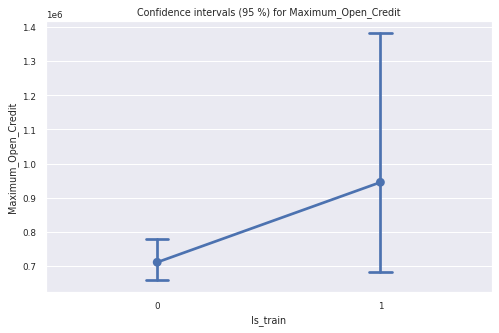

In [73]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Maximum_Open_Credit', data=Maximum_Open_Credit_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Maximum_Open_Credit')
plt.show()

На kdeplot большая разница по плотности, но в целом видно совпадение. Оставить.

**Number_of_Credit_Problems**

In [74]:
shapiro(df_train['Number_of_Credit_Problems'])

ShapiroResult(statistic=0.37480640411376953, pvalue=0.0)

In [75]:
shapiro(df_test['Number_of_Credit_Problems'])

ShapiroResult(statistic=0.29248303174972534, pvalue=0.0)

In [76]:
mannwhitneyu(df_train['Number_of_Credit_Problems'], df_test['Number_of_Credit_Problems'])

MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)

In [77]:
Number_of_Credit_Problems_for_compare = for_compare('Number_of_Credit_Problems')

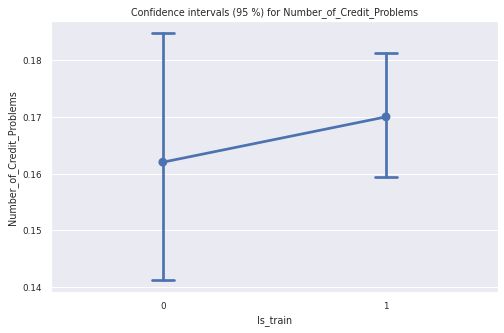

In [78]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Number_of_Credit_Problems', data=Number_of_Credit_Problems_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Number_of_Credit_Problems')
plt.show()

**Bankruptcies**

Здесь небольшое количество Nanов

In [79]:
shapiro(df_train_med['Bankruptcies'])

ShapiroResult(statistic=0.3612915873527527, pvalue=0.0)

In [80]:
shapiro(df_test_med['Bankruptcies'])

ShapiroResult(statistic=0.31436777114868164, pvalue=0.0)

In [81]:
mannwhitneyu(df_train_med['Bankruptcies'], df_test_med['Bankruptcies'])

MannwhitneyuResult(statistic=9260973.0, pvalue=0.04432950519761078)

In [82]:
Bankruptcies_for_compare = for_compare('Bankruptcies')

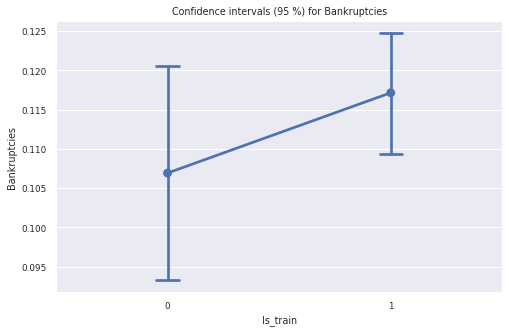

In [83]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Bankruptcies', data=Bankruptcies_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Bankruptcies')
plt.show()

На kdeplot графики визуально совпадают. Оставить.

**Current_Loan_Amount**

In [84]:
shapiro(df_train['Current_Loan_Amount'])

ShapiroResult(statistic=0.37670987844467163, pvalue=0.0)

In [85]:
shapiro(df_test['Current_Loan_Amount'])

ShapiroResult(statistic=0.3815702199935913, pvalue=0.0)

In [86]:
mannwhitneyu(df_train['Current_Loan_Amount'], df_test['Current_Loan_Amount'])

MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)

In [87]:
Current_Loan_Amount_for_compare = for_compare('Current_Loan_Amount')

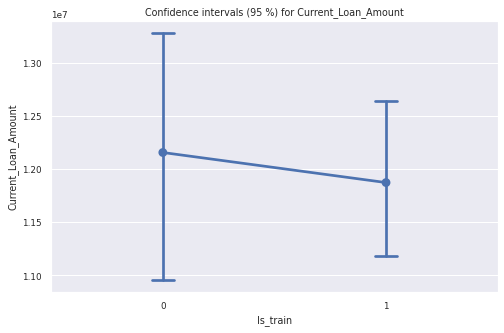

In [88]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Current_Loan_Amount', data=Current_Loan_Amount_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Current_Loan_Amount')
plt.show()

**Current_Credit_Balance**

In [89]:
shapiro(df_train['Current_Credit_Balance'])

ShapiroResult(statistic=0.6394237279891968, pvalue=0.0)

In [90]:
shapiro(df_test['Current_Credit_Balance'])

ShapiroResult(statistic=0.53226637840271, pvalue=0.0)

In [91]:
mannwhitneyu(df_train['Current_Credit_Balance'], df_test['Current_Credit_Balance'])

MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)

In [92]:
Current_Credit_Balance_for_compare = for_compare('Current_Credit_Balance')

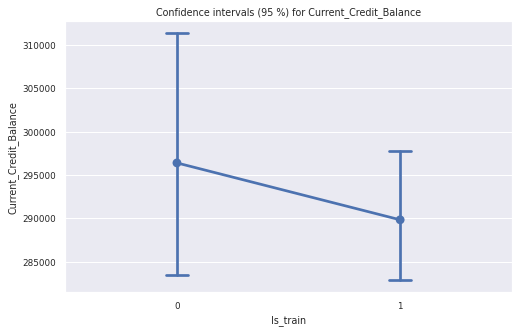

In [93]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Current_Credit_Balance', data=Current_Credit_Balance_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Current_Credit_Balance')
plt.show()

**Monthly_Debt**

In [94]:
shapiro(df_train['Monthly_Debt'])

ShapiroResult(statistic=0.8937593698501587, pvalue=0.0)

In [95]:
shapiro(df_test['Monthly_Debt'])

ShapiroResult(statistic=0.9200007319450378, pvalue=1.6800100977104822e-34)

In [96]:
mannwhitneyu(df_train['Monthly_Debt'], df_test['Monthly_Debt'])

MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)

In [97]:
Monthly_Debt_for_compare = for_compare('Monthly_Debt')

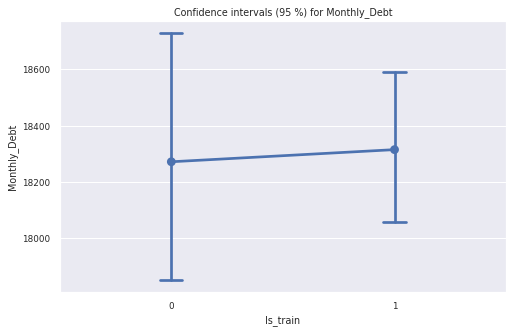

In [98]:
plt.figure(figsize=(8, 5))

sns.pointplot(x='Is_train', y='Monthly_Debt', data=Monthly_Debt_for_compare, capsize=.1)

plt.title('Confidence intervals (95 %) for Monthly_Debt')
plt.show()

**Категориальные признаки**

**Home_Ownership_for_compare**

In [99]:
Home_Ownership_for_compare = for_compare('Home_Ownership')

In [100]:
Home_Ownership_for_compare['id']=Home_Ownership_for_compare.index

In [101]:
table = Home_Ownership_for_compare.pivot_table(values='id', index='Is_train', columns='Home_Ownership', aggfunc='count')
table

Home_Ownership,Have Mortgage,Home Mortgage,Own Home,Rent
Is_train,,,,
0,7,1225,248,1020
1,12,3637,647,3204


In [102]:
chi2, p, _, _ = chi2_contingency(table)
p

0.0835358982760327

**Years_in_current_job**

In [103]:
Years_in_current_job_for_compare = for_compare('Years_in_current_job')
Years_in_current_job_for_compare['id']=Years_in_current_job_for_compare.index
table = Years_in_current_job_for_compare.pivot_table(values='id', index='Is_train', columns='Years_in_current_job', aggfunc='count')
table

Years_in_current_job,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
Is_train,,,,,,,,,,,
0,153,810,212,228,152,169,137,140,107,99,207
1,504,2332,705,620,469,516,426,396,339,259,563


In [104]:
chi2, p, _, _ = chi2_contingency(table)
p

0.5763919572589815

**Purpose**

In [105]:
Purpose_for_compare = for_compare('Purpose')
Purpose_for_compare['id']=Purpose_for_compare.index
table = Purpose_for_compare.pivot_table(values='id', index='Is_train', columns='Purpose', aggfunc='count')
table

Purpose,business loan,buy a car,buy house,debt consolidation,educational expenses,home improvements,major purchase,medical bills,moving,other,renewable energy,small business,take a trip,vacation,wedding
Is_train,,,,,,,,,,,,,,,
0,30.0,34.0,19.0,1973.0,3.0,140.0,9.0,27.0,1.0,240.0,NaN,5.0,14.0,3.0,2.0
1,129.0,96.0,34.0,5944.0,10.0,412.0,40.0,71.0,11.0,665.0,2.0,26.0,37.0,8.0,15.0


In [106]:
table.drop('renewable energy', axis=1, inplace=True)

In [107]:
chi2, p, _, _ = chi2_contingency(table)
p

0.36257788812150127

**Term**

In [108]:
Term_for_compare = for_compare('Term')
Term_for_compare['id']=Term_for_compare.index
table = Term_for_compare.pivot_table(values='id', index='Is_train', columns='Term', aggfunc='count')
table

Term,Long Term,Short Term
Is_train,,
0,639,1861
1,1944,5556


In [109]:
chi2, p, _, _ = chi2_contingency(table)
p

0.7415784078538388

## 3. **Корреляция с базовыми признаками**  <a class='anchor' id='eda'>

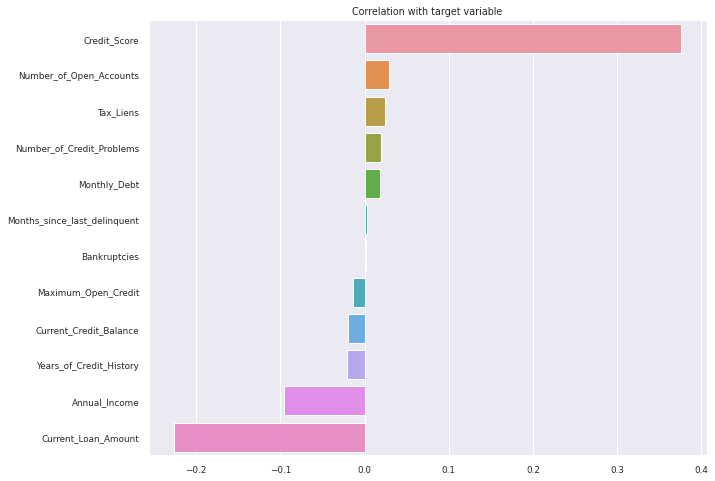

In [110]:
corr_with_target = df_train_med[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Исследую Credit_Score, Annual_Income и Current_Loan_Amount

**Credit_Score**

In [111]:
df_train.Credit_Score.isna().sum()

1557

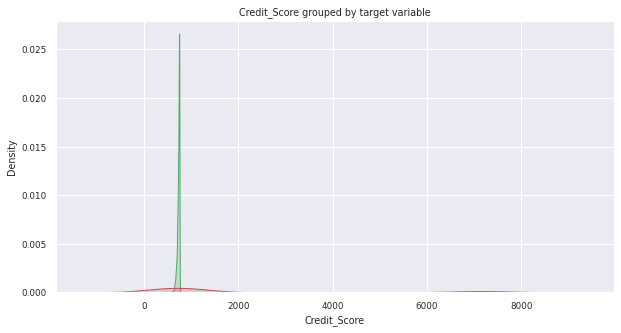

In [112]:
Credit_Score_with_target = df_train[['Credit_Score', TARGET_NAME]]
Credit_Score = Credit_Score_with_target['Credit_Score']
Credit_Score_target_0 = Credit_Score[Credit_Score_with_target[TARGET_NAME] == 0] 
Credit_Score_target_1 = Credit_Score[Credit_Score_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(Credit_Score_target_0, shade=True, label='Погашен вовремя', color='g')
sns.kdeplot(Credit_Score_target_1, shade=True, label='Просрочка', color='r')

plt.xlabel('Credit_Score')
plt.title('Credit_Score grouped by target variable')
plt.show()

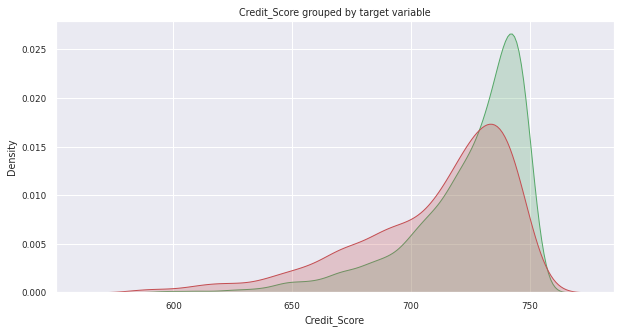

In [113]:
plt.figure(figsize=(10, 5))

sns.kdeplot(Credit_Score_target_0[df_train.Credit_Score < 2000], shade=True, label='Погашен вовремя', color='g')
sns.kdeplot(Credit_Score_target_1[df_train.Credit_Score < 2000], shade=True, label='Просрочка', color='r')

plt.xlabel('Credit_Score')
plt.title('Credit_Score grouped by target variable')
plt.show()

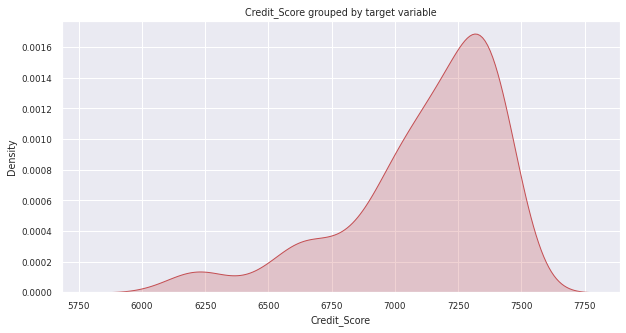

In [114]:
plt.figure(figsize=(10, 5))

sns.kdeplot(Credit_Score_target_0[df_train.Credit_Score > 6000], shade=True, label='Погашен вовремя', color='g')
sns.kdeplot(Credit_Score_target_1[df_train.Credit_Score > 6000], shade=True, label='Просрочка', color='r')

plt.xlabel('Credit_Score')
plt.title('Credit_Score grouped by target variable')
plt.show()

На 1 видно выбросы справа, с ними что-то надо делать. Признак качественный, но много Нанов.

**Annual_Income**

In [115]:
df_train.Annual_Income.isna().sum()

1557

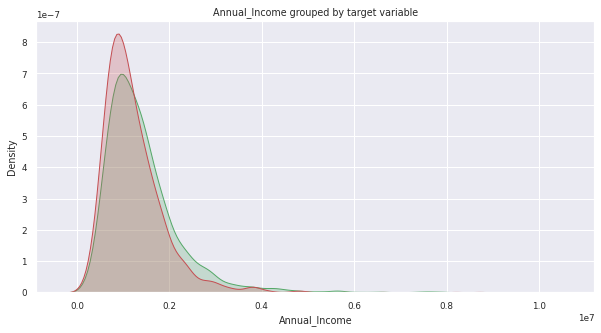

In [116]:
Annual_Income_with_target = df_train[['Annual_Income', TARGET_NAME]]
Annual_Income = Annual_Income_with_target['Annual_Income']
Annual_Income_target_0 = Annual_Income[Annual_Income_with_target[TARGET_NAME] == 0] 
Annual_Income_target_1 = Annual_Income[Annual_Income_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(Annual_Income_target_0, shade=True, label='Погашен вовремя', color='g')
sns.kdeplot(Annual_Income_target_1, shade=True, label='Просрочка', color='r')

plt.xlabel('Annual_Income')
plt.title('Annual_Income grouped by target variable')
plt.show()

In [117]:
shapiro(df_train_med['Annual_Income'])

ShapiroResult(statistic=0.7313876152038574, pvalue=0.0)

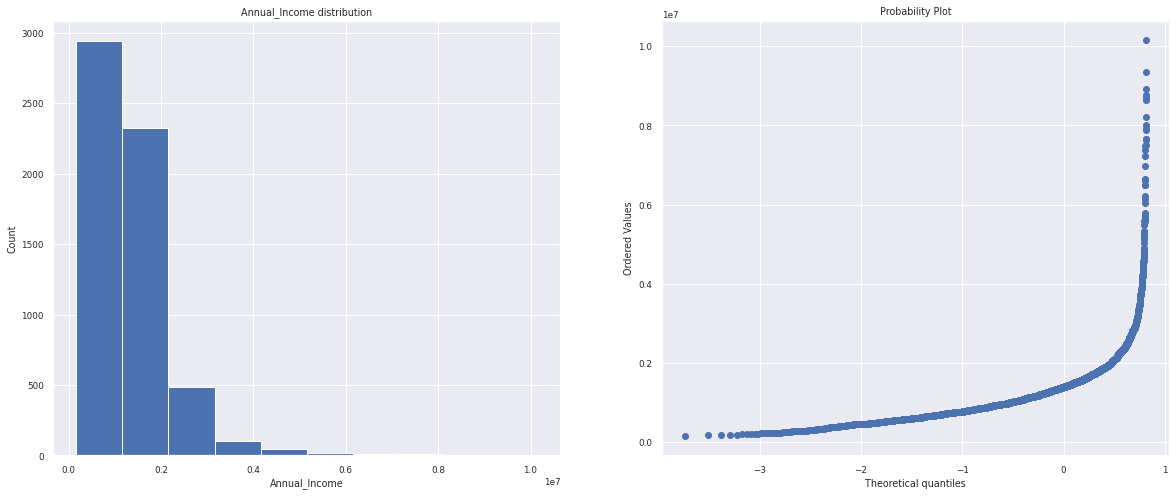

In [118]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Annual_Income')
ax1.set_ylabel('Count')
ax1.set_title('Annual_Income distribution')
Annual_Income.hist()

plt.subplot(122)
probplot(Annual_Income, dist='norm', plot=plt)

plt.show()

Воспользуюсь критерием Манна_Уитни для проверки гипотезы о равности матожиданий.

In [119]:
mannwhitneyu(Annual_Income_target_0, Annual_Income_target_1)

MannwhitneyuResult(statistic=5534342.5, pvalue=0.031334788783133206)

Построю доверительные интервалы

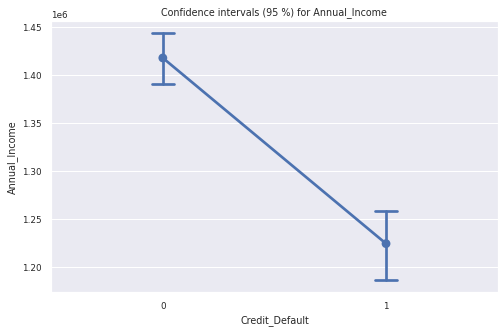

In [120]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Annual_Income', data=Annual_Income_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for Annual_Income')
plt.show()

Гипотеза о равности средних отвергается. Признак полезный. На "нулевом" графике есть выбросы справа но для погашенной задолженности это логично.

**Current_Loan_Amount**

In [121]:
df_train.Current_Loan_Amount.isna().sum()

0

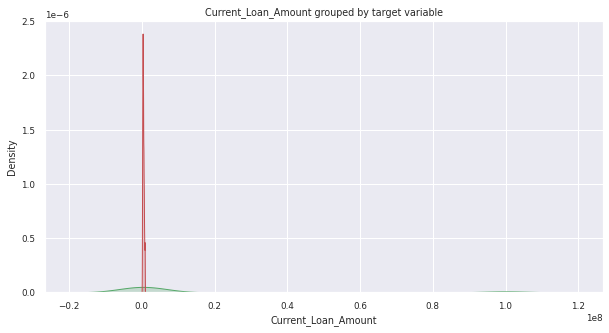

In [122]:
Current_Loan_Amount_with_target = df_train[['Current_Loan_Amount', TARGET_NAME]]
Current_Loan_Amount = Current_Loan_Amount_with_target['Current_Loan_Amount']
Current_Loan_Amount_target_0 = Current_Loan_Amount[Current_Loan_Amount_with_target[TARGET_NAME] == 0] 
Current_Loan_Amount_target_1 = Current_Loan_Amount[Current_Loan_Amount_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(Current_Loan_Amount_target_0, shade=True, label='Погашен вовремя', color='g')
sns.kdeplot(Current_Loan_Amount_target_1, shade=True, label='Просрочка', color='r')

plt.xlabel('Current_Loan_Amount')
plt.title('Current_Loan_Amount grouped by target variable')
plt.show()

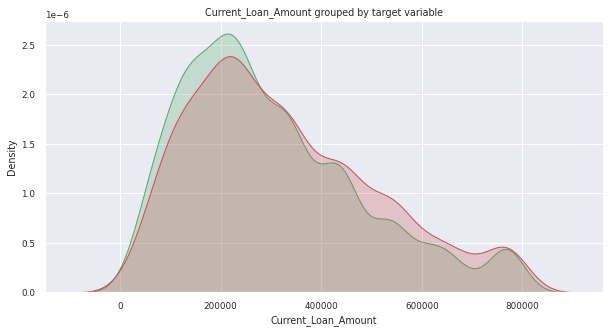

In [123]:
plt.figure(figsize=(10, 5))

sns.kdeplot(Current_Loan_Amount_target_0[Current_Loan_Amount_with_target.Current_Loan_Amount < 20000000], shade=True, label='Погашен вовремя', color='g')
sns.kdeplot(Current_Loan_Amount_target_1[Current_Loan_Amount_with_target.Current_Loan_Amount < 20000000], shade=True, label='Просрочка', color='r')

plt.xlabel('Current_Loan_Amount')
plt.title('Current_Loan_Amount grouped by target variable')
plt.show()

In [124]:
shapiro(df_train['Current_Loan_Amount'])

ShapiroResult(statistic=0.37670987844467163, pvalue=0.0)

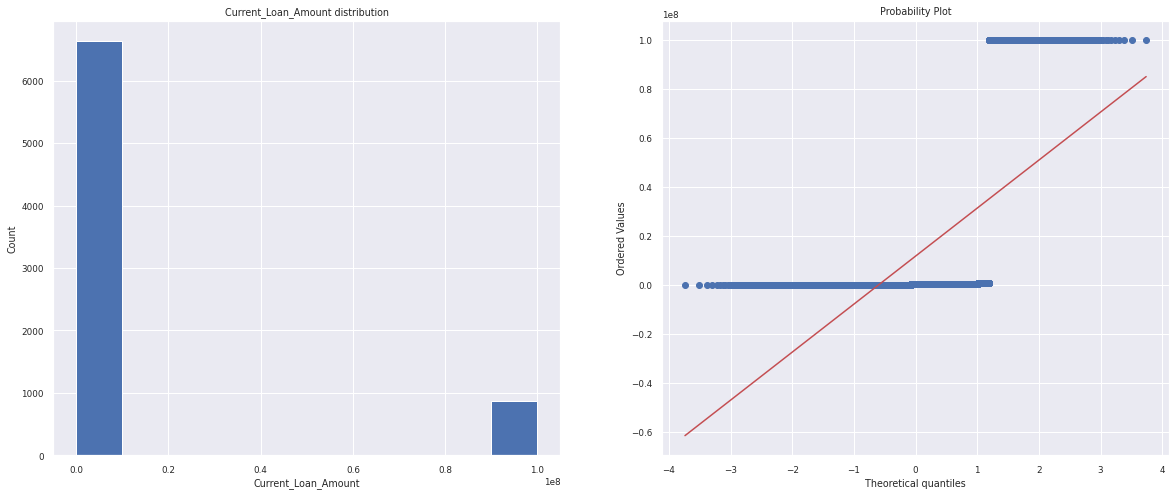

In [125]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Current_Loan_Amount')
ax1.set_ylabel('Count')
ax1.set_title('Current_Loan_Amount distribution')
Current_Loan_Amount.hist()

plt.subplot(122)
probplot(Current_Loan_Amount, dist='norm', plot=plt)

plt.show()

In [126]:
mannwhitneyu(Current_Loan_Amount_target_0, Current_Loan_Amount_target_1)

MannwhitneyuResult(statistic=5169258.0, pvalue=2.923443678733522e-10)

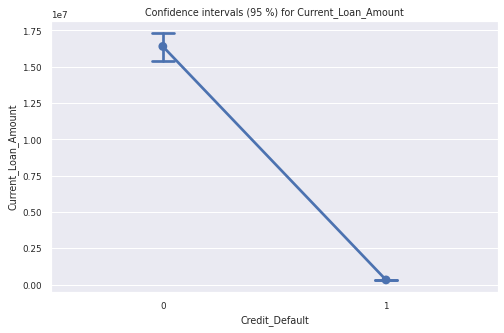

In [127]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Current_Loan_Amount', data=Current_Loan_Amount_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for Current_Loan_Amount')
plt.show()

Признак полезный. 

## 4. **Работа с категориальными признаками**  <a class='anchor' id='eda'>

Строю доверительные интервалы по полной наиболее коррелирующей c целевой фиче.

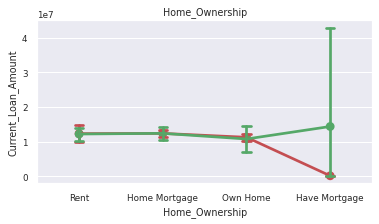

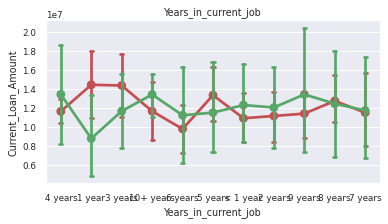

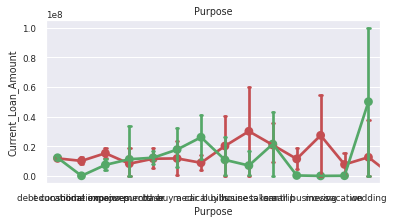

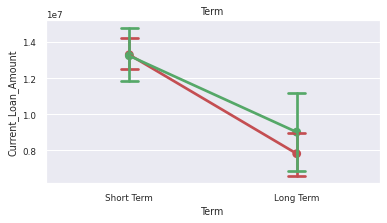

In [128]:
num_feature = 'Current_Loan_Amount'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=df_train, capsize=.1, label='train', color='r')
    sns.pointplot(x=col, y=num_feature, data=df_test, capsize=.1, label='test', color='g')
    plt.title(col) 
    plt.show()

In [129]:
df_train_cat = df_train[CAT_FEATURE_NAMES + [TARGET_NAME]]
df_train['Id'] = df_train.index
df_train.head()

,Home_Ownership,Annual_Income,Years_in_current_job,Tax_Liens,Number_of_Open_Accounts,Years_of_Credit_History,Maximum_Open_Credit,Number_of_Credit_Problems,Months_since_last_delinquent,Bankruptcies,Purpose,Term,Current_Loan_Amount,Current_Credit_Balance,Monthly_Debt,Credit_Score,Credit_Default,Id
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,2
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,3
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,4


In [130]:
keys2=[]

In [131]:
def corr_for_terget(feature, keys=keys2, df=df_train):
    # Построение матрицы корреляции
    keys2.sort()
    values2 = [1] * len(keys2)
    values3=[]
    for i in range(len(keys2)):
        values3.append(values2)
    dictionary = dict(zip(keys2, values3))
    Matrix=pd.DataFrame(dictionary)
    b=pd.Series(keys2)
    Matrix.insert(0, 'Item', b)   
    for i in range(len(keys2)):
        for j in range(len(keys2)):
            feature_and_target_s = df.loc[df[feature].isin([keys2[i], keys2[j]]),['Id', feature, TARGET_NAME]]
            table = feature_and_target_s.pivot_table(values='Id', index=feature, columns=TARGET_NAME, aggfunc='count')
            chi2, p, _, _ = chi2_contingency(table)
            Matrix.loc[i, keys2[j]] = p 
    Matrix.set_index('Item', inplace=True)

    return Matrix 

**Оценка признака "Home_Ownership" в разрезе целевой переменной**

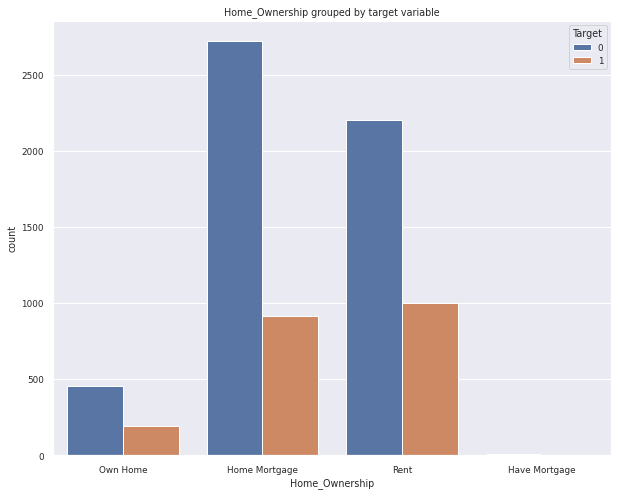

In [133]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Home_Ownership", hue=TARGET_NAME, data=df_train)
plt.title('Home_Ownership grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [134]:
df_train.Home_Ownership.unique().tolist()

['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage']

In [135]:
keys2=['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage']

In [136]:
Matrix=corr_for_terget("Home_Ownership", keys=keys2, df=df_train)

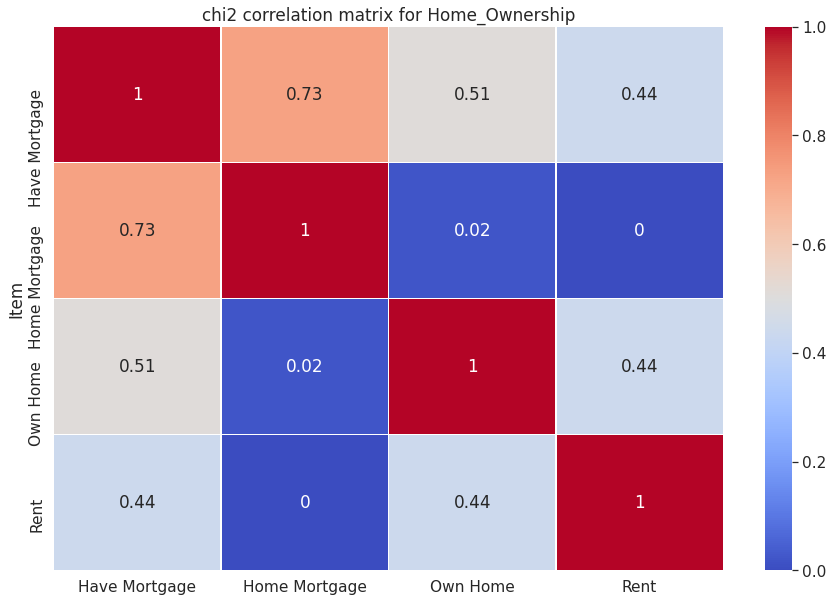

In [137]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)
Matrix = np.round(Matrix, 2) 
Matrix[np.abs(Matrix) < 0.1] 
sns.heatmap(Matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('chi2 correlation matrix for Home_Ownership')
plt.show()

Объединяю значения

In [138]:
def change_Home_Ownership(df):
    df.loc[df['Home_Ownership'].isin(['Home Mortgage', 'Have Mortgage']),'Home_Ownership'] = 'Mortgage'
    df.loc[df['Home_Ownership'].isin(['Own Home', 'Rent']), 'Home_Ownership'] = 'Own_Rent'
    return df

In [139]:
df_train=change_Home_Ownership(df_train)
df_test=change_Home_Ownership(df_test)

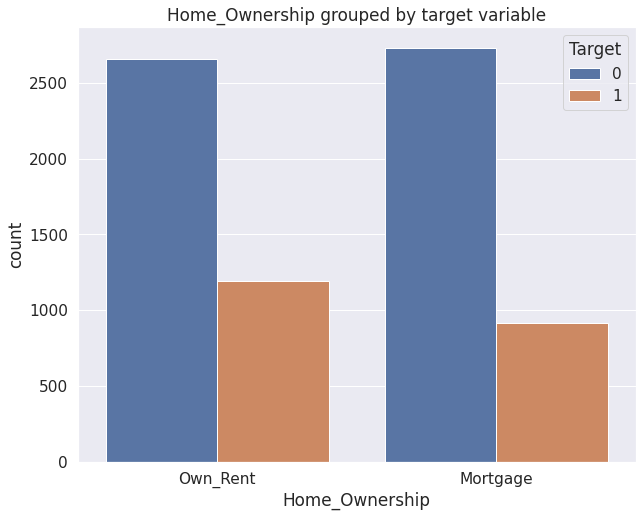

In [140]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Home_Ownership", hue=TARGET_NAME, data=df_train)
plt.title('Home_Ownership grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

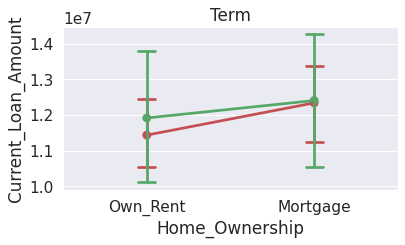

In [141]:
plt.figure(figsize=figsize)
sns.pointplot(x='Home_Ownership', y=num_feature, data=df_train, capsize=.1, label='train', color='r')
sns.pointplot(x='Home_Ownership', y=num_feature, data=df_test, capsize=.1, label='test', color='g')
plt.title(col) 
plt.show()

На Катбусте целевая метрика при объединении упала с 0,57/0,54 до 0,62/0,54

**Оценка признака "Years_in_current_job" в разрезе целевой переменной**

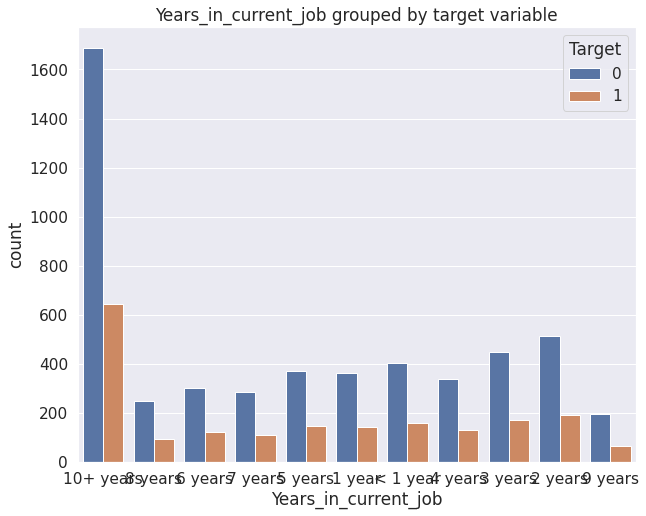

In [142]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Years_in_current_job", hue=TARGET_NAME, data=df_train)
plt.title('Years_in_current_job grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [143]:
df_train['Years_in_current_job'].unique().tolist()

[nan,
 '10+ years',
 '8 years',
 '6 years',
 '7 years',
 '5 years',
 '1 year',
 '< 1 year',
 '4 years',
 '3 years',
 '2 years',
 '9 years']

In [144]:
keys2 = ['10+ years', '8 years', '6 years', '7 years', '5 years', '1 year', '< 1 year', '4 years',
         '3 years', '2 years', '9 years']
keys2.sort()

In [145]:
values2 = [1] * len(keys2)
values3=[]

In [146]:
for i in range(len(keys2)):
    values3.append(values2)

In [147]:
dictionary = dict(zip(keys2, values3))
Matrix=pd.DataFrame(dictionary)

In [148]:
b=pd.Series(keys2)
Matrix.insert(0, 'Item', b)

In [149]:
for i in range(len(keys2)):
    for j in range(len(keys2)):
        Years_in_current_job_and_target_s = df_train.loc[df_train['Years_in_current_job'].isin([keys2[i], keys2[j]]),['Id', 'Years_in_current_job', TARGET_NAME]]
        table = Years_in_current_job_and_target_s.pivot_table(values='Id', index='Years_in_current_job', columns=TARGET_NAME, aggfunc='count')
        chi2, p, _, _ = chi2_contingency(table)
        Matrix.loc[i, keys2[j]] = p

In [150]:
Matrix.set_index('Item', inplace=True)

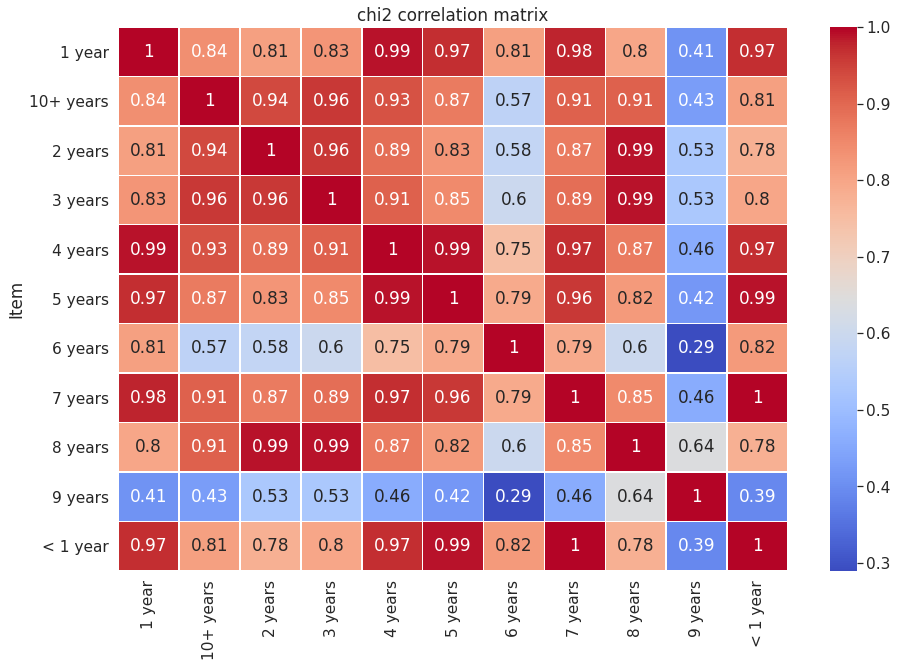

In [151]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)
Matrix = np.round(Matrix, 2) 
Matrix[np.abs(Matrix) < 0.1] = 0 
sns.heatmap(Matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('chi2 correlation matrix')
plt.show()

Все значения в признаке "Years_in_current_job" в разрезе целевой переменной коррелируют. Но удаление признака ухудшило целевую метрику.

In [152]:
df_train.drop("Years_in_current_job", axis=1, inplace=True)

In [153]:
df_test.drop("Years_in_current_job", axis=1, inplace=True)

**Оценка признака "Purpose" в разрезе целевой переменной**

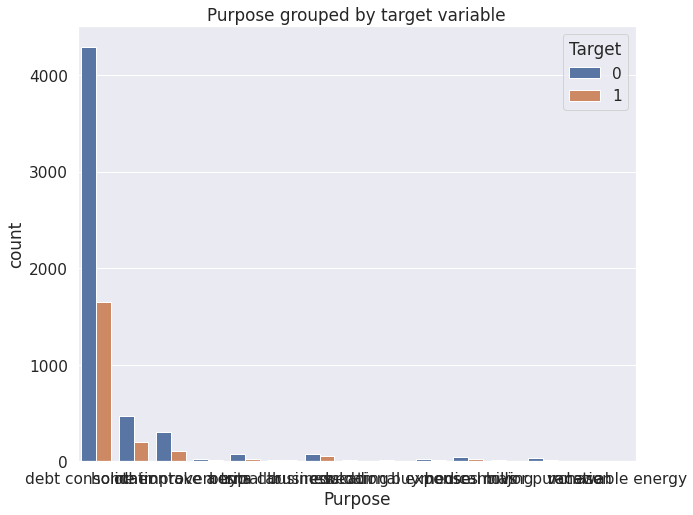

In [154]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Purpose", hue=TARGET_NAME, data=df_train)
plt.title('Purpose grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

In [155]:
df_train.Purpose.isna().sum()

0

In [156]:
df_train.Purpose.unique().tolist()

['debt consolidation',
 'other',
 'home improvements',
 'take a trip',
 'buy a car',
 'small business',
 'business loan',
 'wedding',
 'educational expenses',
 'buy house',
 'medical bills',
 'moving',
 'major purchase',
 'vacation',
 'renewable energy']

In [157]:
keys2 = ['debt consolidation', 'other', 'home improvements', 'take a trip', 'buy a car', 'small business', 'business loan', 'wedding', 'educational expenses',
          'buy house', 'medical bills', 'moving', 'major purchase', 'vacation', 'renewable energy']

In [158]:
Matrix=corr_for_terget("Purpose", keys=keys2, df=df_train)

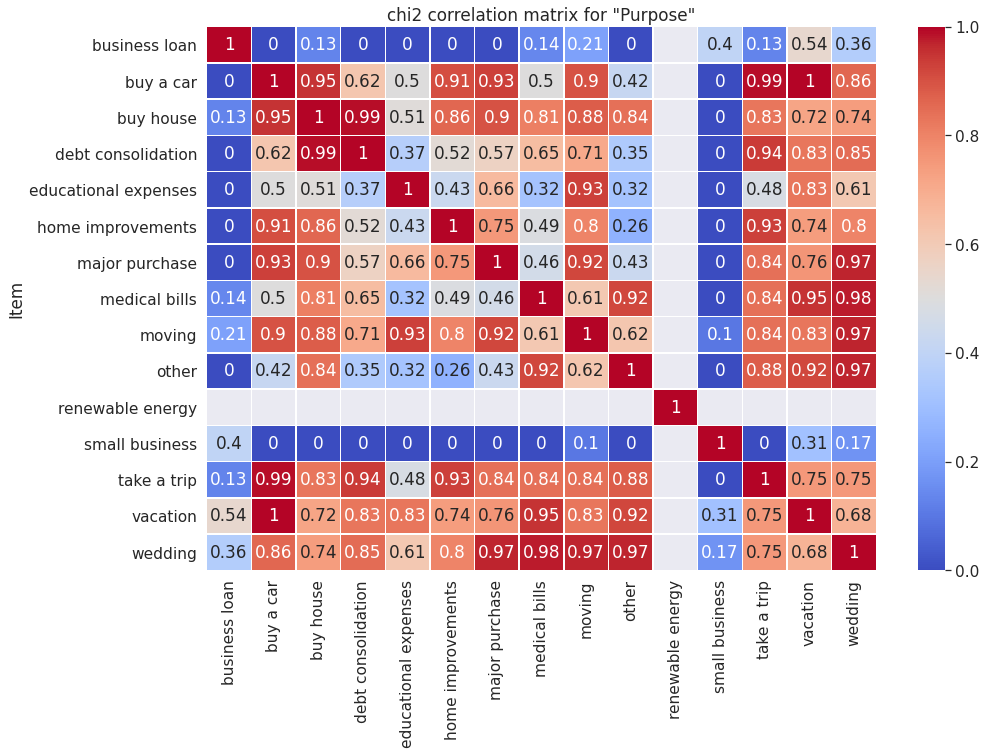

In [159]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)
Matrix = np.round(Matrix, 2) 
Matrix[np.abs(Matrix) < 0.1] = 0  
sns.heatmap(Matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('chi2 correlation matrix for "Purpose"')
plt.show()

Объединю признаки. Это общая функция для всех 3 преобразований.

In [160]:
def change_Purpose(df):
    df.loc[df['Purpose'].isin(['take a trip', 'buy a car']),'Purpose'] = 'take_buy'
    df.loc[df['Purpose'].isin(['medical bills', 'wedding']), 'Purpose'] = 'medical_wedding'
    df.loc[df['Purpose'].isin(['other', 'vacation']),'Purpose'] = 'other_vacation'
    df.loc[df['Purpose'].isin(['educational expenses', 'moving']), 'Purpose'] = 'educational_moving'
    df.loc[df['Purpose'].isin(['buy house', 'major purchase']),'Purpose'] = 'buy_major'
    df.loc[df['Purpose'].isin(['small business', 'business loan']),'Purpose'] = 'business_small'
    df.loc[df['Purpose'].isin(['take_buy', 'buy_major']),'Purpose'] = 'major_buy'
    df.loc[df['Purpose'].isin(['debt consolidation', 'home improvements']), 'Purpose'] = 'debt_home'
    df.loc[df['Purpose'].isin(['educational_moving', 'medical_wedding']),'Purpose'] = 'educational_medical'
    df.loc[df['Purpose'].isin(['debt_home', 'educational_medical']),'Purpose'] = 'educational_debt'
    df.loc[df['Purpose'].isin(['other_vacation', 'major_buy']), 'Purpose'] = 'other_major'
    
    return df

In [161]:
def change_Purpose2(df):
    df.loc[df['Purpose'].isin(['take_buy', 'buy_major']),'Purpose'] = 'major_buy'
    df.loc[df['Purpose'].isin(['debt consolidation', 'home improvements']), 'Purpose'] = 'debt_home'
    df.loc[df['Purpose'].isin(['educational_moving', 'medical_wedding']),'Purpose'] = 'educational_medical'

    return df

In [162]:
def change_Purpose3(df):
    df.loc[df['Purpose'].isin(['debt_home', 'educational_medical']),'Purpose'] = 'educational_debt'
    df.loc[df['Purpose'].isin(['other_vacation', 'major_buy']), 'Purpose'] = 'other_major'

    return df

In [163]:
df_train=change_Purpose(df_train)
df_test=change_Purpose(df_test)

In [164]:
df_train.head()

,Home_Ownership,Annual_Income,Tax_Liens,Number_of_Open_Accounts,Years_of_Credit_History,Maximum_Open_Credit,Number_of_Credit_Problems,Months_since_last_delinquent,Bankruptcies,Purpose,Term,Current_Loan_Amount,Current_Credit_Balance,Monthly_Debt,Credit_Score,Credit_Default,Id
0,Own_Rent,482087.0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,educational_debt,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
1,Own_Rent,1025487.0,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,educational_debt,Long Term,264968.0,394972.0,18373.0,737.0,1,1
2,Mortgage,751412.0,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,educational_debt,Short Term,99999999.0,308389.0,13651.0,742.0,0,2
3,Own_Rent,805068.0,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,educational_debt,Short Term,121396.0,95855.0,11338.0,694.0,0,3
4,Own_Rent,776264.0,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,educational_debt,Short Term,125840.0,93309.0,7180.0,719.0,0,4


In [165]:
df_train.Purpose.unique().tolist()

['educational_debt', 'other_major', 'business_small', 'renewable energy']

In [166]:
keys2=['educational_debt', 'other_major', 'business_small', 'renewable energy']

In [167]:
Matrix=corr_for_terget("Purpose", keys=keys2, df=df_train)

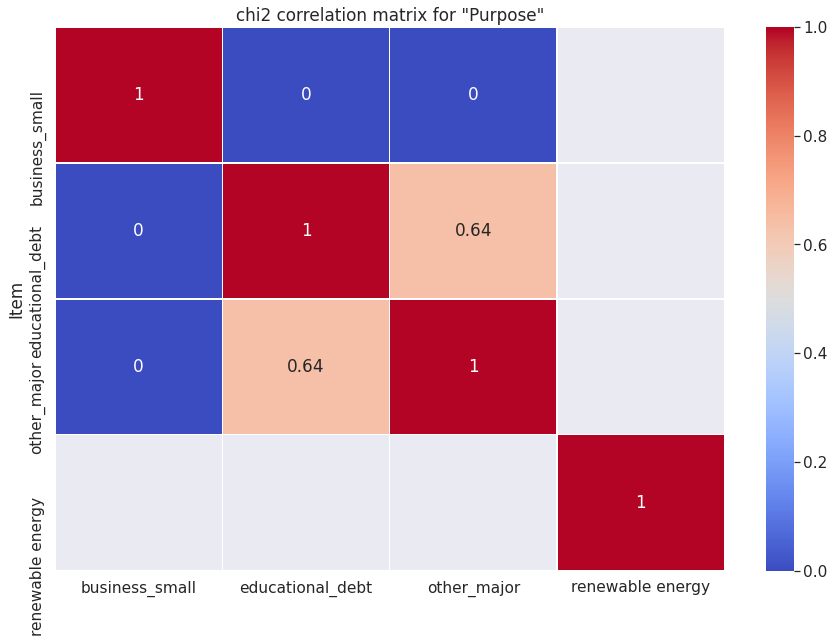

In [168]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)
Matrix = np.round(Matrix, 2)  
Matrix[np.abs(Matrix) < 0.1] = 0  
sns.heatmap(Matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('chi2 correlation matrix for "Purpose"')
plt.show()

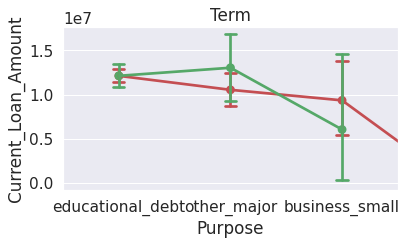

In [169]:
plt.figure(figsize=figsize)
sns.pointplot(x='Purpose', y=num_feature, data=df_train, capsize=.1, label='train', color='r')
sns.pointplot(x='Purpose', y=num_feature, data=df_test, capsize=.1, label='test', color='g')
plt.title(col) 
plt.show()

In [170]:
df_train=change_Purpose2(df_train)
df_test=change_Purpose2(df_test)

In [171]:
df_train.Purpose.unique().tolist()

['educational_debt', 'other_major', 'business_small', 'renewable energy']

In [172]:
keys2=['educational_debt', 'other_major', 'business_small', 'renewable energy']

In [173]:
Matrix=corr_for_terget("Purpose", keys=keys2, df=df_train)

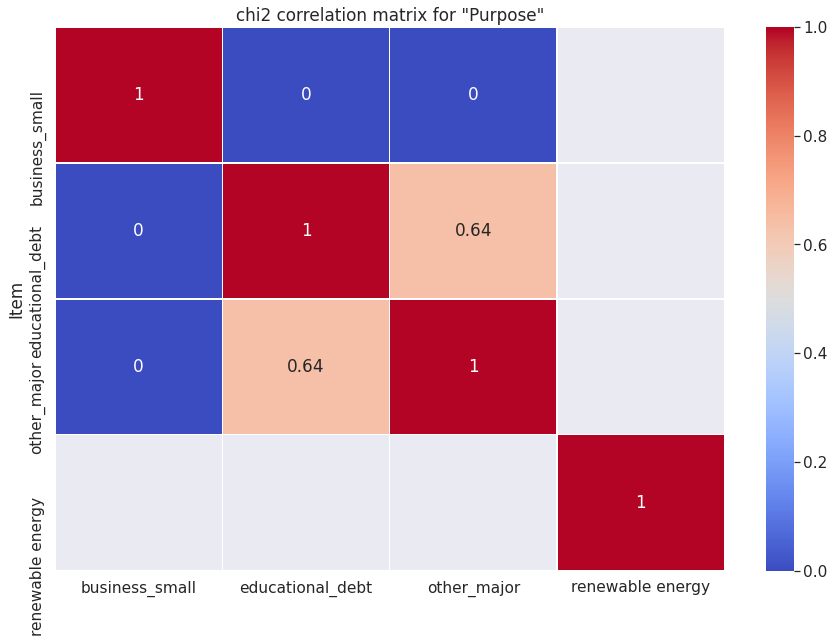

In [174]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)
Matrix = np.round(Matrix, 2) 
Matrix[np.abs(Matrix) < 0.1] = 0  
sns.heatmap(Matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('chi2 correlation matrix for "Purpose"')
plt.show()

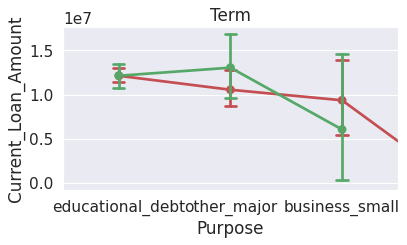

In [175]:
plt.figure(figsize=figsize)
sns.pointplot(x='Purpose', y=num_feature, data=df_train, capsize=.1, label='train', color='r')
sns.pointplot(x='Purpose', y=num_feature, data=df_test, capsize=.1, label='test', color='g')
plt.title(col) 
plt.show()

In [176]:
df_train=change_Purpose3(df_train)
df_test=change_Purpose3(df_test)

In [177]:
df_train.Purpose.unique().tolist()

['educational_debt', 'other_major', 'business_small', 'renewable energy']

In [178]:
keys2=['educational_debt', 'other_major', 'business_small', 'renewable energy']

In [179]:
Matrix=corr_for_terget("Purpose", keys=keys2, df=df_train)

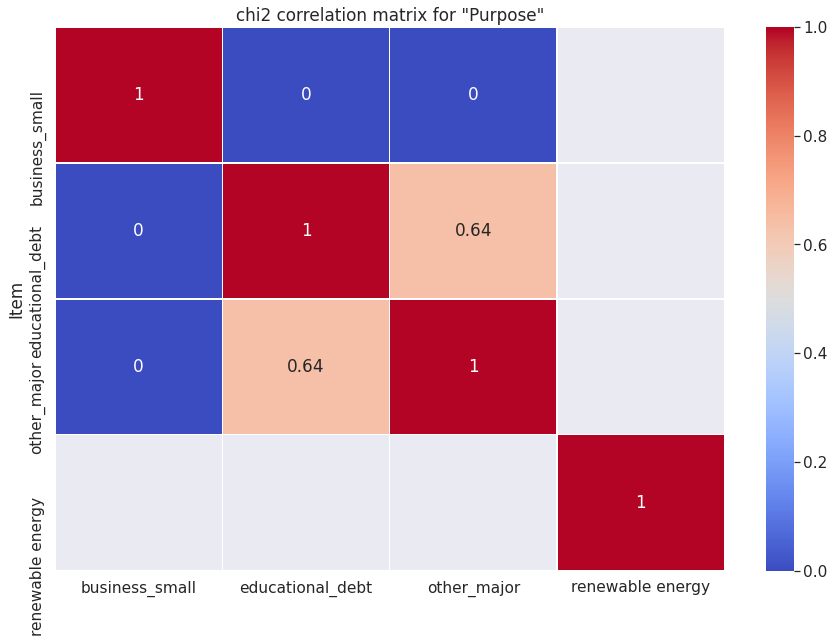

In [180]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)
Matrix = np.round(Matrix, 2)  
Matrix[np.abs(Matrix) < 0.1] = 0  
sns.heatmap(Matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('chi2 correlation matrix for "Purpose"')
plt.show()

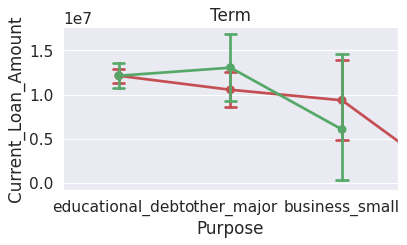

In [181]:
plt.figure(figsize=figsize)
sns.pointplot(x='Purpose', y=num_feature, data=df_train, capsize=.1, label='train', color='r')
sns.pointplot(x='Purpose', y=num_feature, data=df_test, capsize=.1, label='test', color='g')
plt.title(col) 
plt.show()

In [182]:
def change_Purpose4(df):
    df.loc[df['Purpose'].isin(['educational_debt', 'other_major']),'Purpose'] = 'game_other'

    return df

In [183]:
df_train=change_Purpose4(df_train)
df_test=change_Purpose4(df_test)

In [184]:
df_train.Purpose.unique().tolist()

['game_other', 'business_small', 'renewable energy']

In [185]:
keys2=['game_other', 'business_small', 'renewable energy']

In [186]:
Matrix=corr_for_terget("Purpose", keys=keys2, df=df_train)

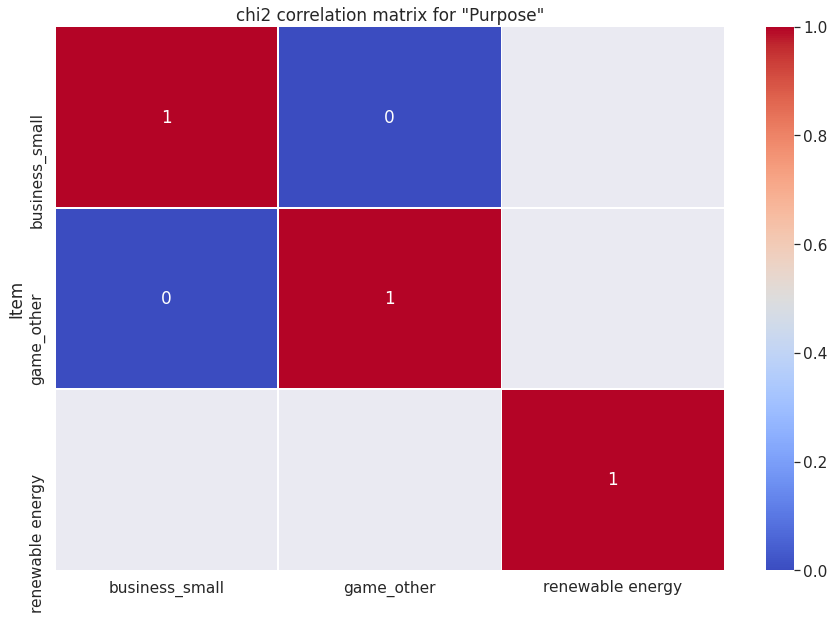

In [187]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)
Matrix = np.round(Matrix, 2)  
Matrix[np.abs(Matrix) < 0.1] = 0  
sns.heatmap(Matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('chi2 correlation matrix for "Purpose"')
plt.show()

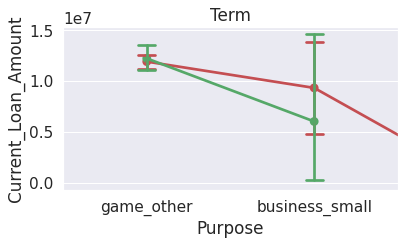

In [188]:
plt.figure(figsize=figsize)
sns.pointplot(x='Purpose', y=num_feature, data=df_train, capsize=.1, label='train', color='r')
sns.pointplot(x='Purpose', y=num_feature, data=df_test, capsize=.1, label='test', color='g')
plt.title(col) 
plt.show()

In [189]:
#df_train.Purpose.value_counts()

Да уж. Признак так себе. Преобразование признака увеличило целевую метрику на 0,1

**Оценка признака "Term" в разрезе целевой переменной**

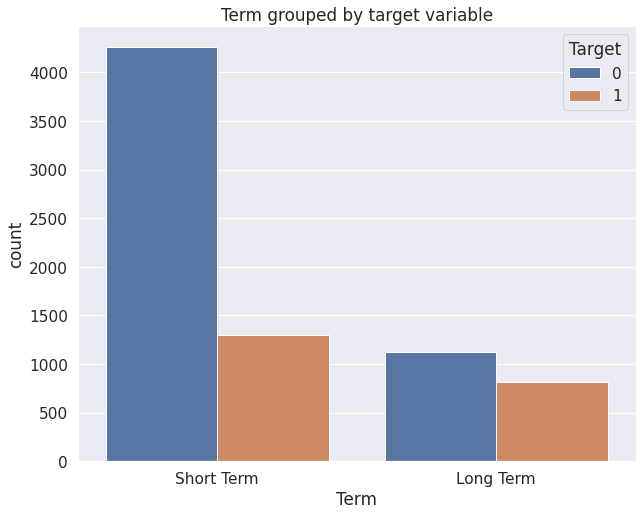

In [190]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Term", hue=TARGET_NAME, data=df_train)
plt.title('Term grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

По гистограмме видно отличие частот.

**GET_DUMMIES**

Гет даммис уменьшил целевую переменную

In [191]:
#df_train=pd.get_dummies(df_train, prefix=['Term', 'Purpose', 'Home_Ownership'])

In [192]:
#df_train.head()

## 5. **ОБРАБОТКА ВЫБРОСОВ**  <a class='anchor' id='eda'>

**Annual_Income**

<AxesSubplot:>

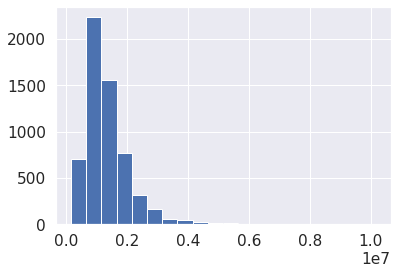

In [193]:
df_train.Annual_Income.hist(bins=20)

<AxesSubplot:>

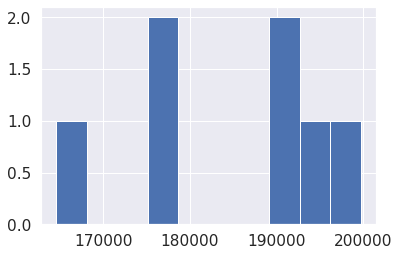

In [194]:
df_train.Annual_Income[df_train['Annual_Income'] < 200000].hist()

доход менее 140000 похож на маленький выброс, он почти на порядок меньше медианы. Заменю пока на 0.

In [195]:
df_train.Annual_Income.median()

1168386.0

In [196]:
df_train.loc[df_train.Annual_Income < 140000, 'Annual_Income'] = 0

<AxesSubplot:>

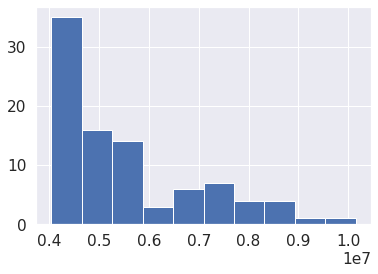

In [197]:
df_train.Annual_Income[df_train['Annual_Income'] > 4000000].hist()

Наибольшая корреляция с Monthly_Debt

In [198]:
df_train.Monthly_Debt.value_counts()

0.0        6
19222.0    4
19667.0    4
9525.0     3
22364.0    3
          ..
12897.0    1
27541.0    1
23227.0    1
55957.0    1
17.0       1
Name: Monthly_Debt, Length: 6716, dtype: int64

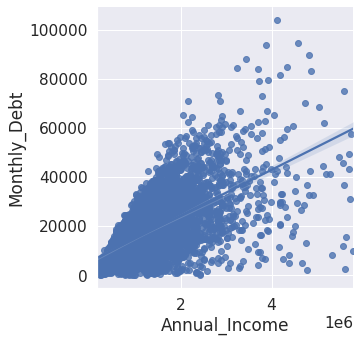

In [199]:
sns.lmplot(x='Annual_Income', y='Monthly_Debt', data=df_train[(df_train.Annual_Income < 6000000)])

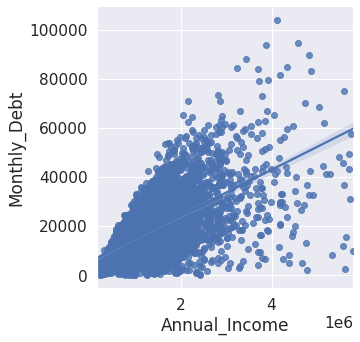

In [200]:
sns.lmplot(x='Annual_Income', y='Monthly_Debt', data=df_train[(df_train.Annual_Income < 6000000)])

Четко видна линия сопростивления по верхней границе данных с небольшим запасом  от точки (0, 10000) до (2000000, 70000). Все что будет выше нужно обрабатывать.

In [201]:
for idx, row in df_train.iterrows():
    if (row.Monthly_Debt - 10000)/row.Annual_Income > 0.03:
        df_train.loc[idx, 'Monthly_Debt'] = df_train.Monthly_Debt.median()

In [202]:
df_train.Annual_Income[df_train['Annual_Income'] > 11000000].value_counts()

Series([], Name: Annual_Income, dtype: int64)

**Number_of_Open_Accounts**

<AxesSubplot:>

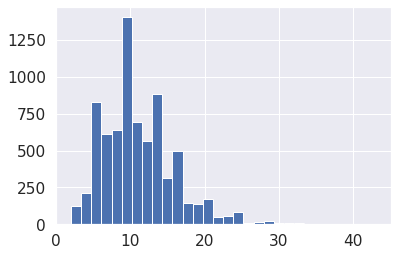

In [203]:
df_train.Number_of_Open_Accounts.hist(bins=30)

Корреляция с Monthly_Debt

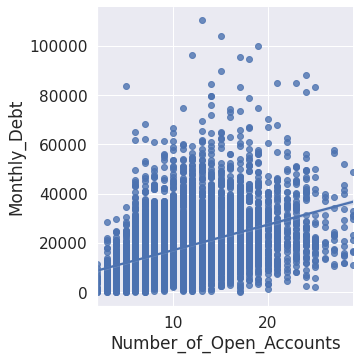

In [204]:
sns.lmplot(x='Number_of_Open_Accounts', y='Monthly_Debt', data=df_train[(df_train.Number_of_Open_Accounts < 30)])

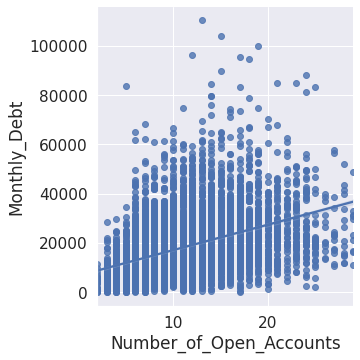

In [205]:
sns.lmplot(x='Number_of_Open_Accounts', y='Monthly_Debt', data=df_train[(df_train.Number_of_Open_Accounts < 30)])

Здесь тоже видна линия сопростивления от точки (0, 30000) до (10, 80000). Выбросов немного, убираем на медиану.

In [206]:
for idx, row in df_train.iterrows():
    if (row.Monthly_Debt - 10000)/row.Number_of_Open_Accounts > 5000:
        df_train.loc[idx, 'Monthly_Debt'] = df_train.Monthly_Debt.median()

<AxesSubplot:>

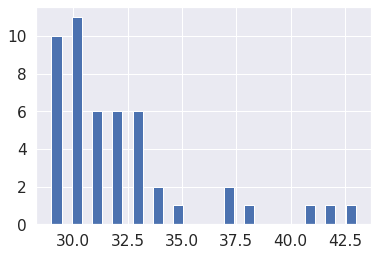

In [207]:
df_train.Number_of_Open_Accounts[df_train.Number_of_Open_Accounts > 28].hist(bins=30)

**Credit_Score**

<AxesSubplot:>

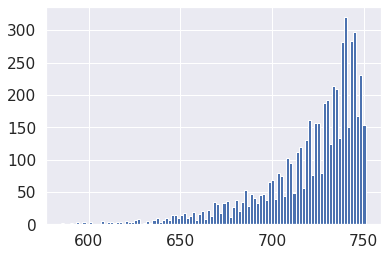

In [208]:
df_train.Credit_Score[df_train.Credit_Score < 1000].hist(bins=100)

<AxesSubplot:>

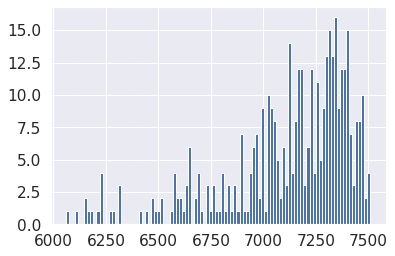

In [209]:
df_train.Credit_Score[df_train.Credit_Score > 900].hist(bins=100)

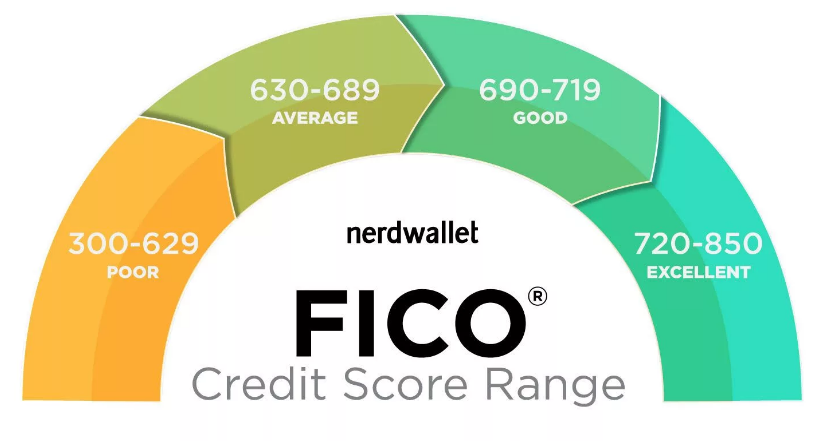

Из гистограмм и картинки видно, что на нижней гистограмме ошиблись с ноликом скорее всего. Исправляю.

In [210]:
for idx, row in df_train.iterrows():
    if (row.Credit_Score > 1000):
        df_train.loc[idx, 'Credit_Score'] = row.Credit_Score/10

**Tax_Liens**

In [211]:
df_train.Tax_Liens.value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax_Liens, dtype: int64

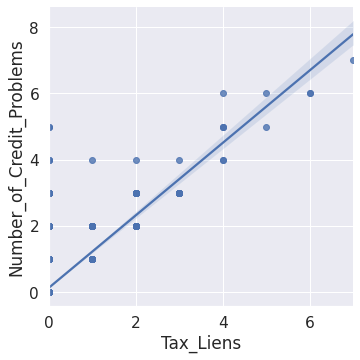

In [212]:
sns.lmplot(x='Tax_Liens', y='Number_of_Credit_Problems', data=df_train[(df_train.Tax_Liens < 30)])

Здесь и обрабатывать то нечего. То что большинство не имеет налогового обременения на счета это нормально.

**Number_of_Credit_Problems**

In [213]:
df_train.Number_of_Credit_Problems.value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number_of_Credit_Problems, dtype: int64

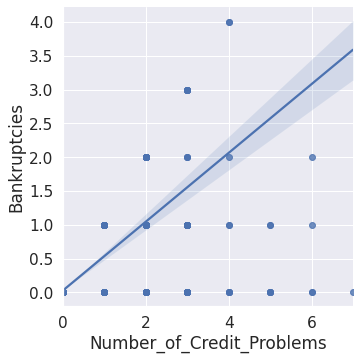

In [214]:
sns.lmplot(y='Bankruptcies', x='Number_of_Credit_Problems', data=df_train[(df_train.Number_of_Credit_Problems < 30)])

Все ровно.

**Current_Loan_Amount**

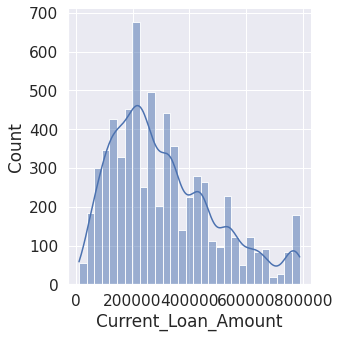

In [215]:
sns.displot(x='Current_Loan_Amount', kde=True,
            data=df_train[df_train.Current_Loan_Amount < 1000000 ])

In [216]:
df_train.Current_Loan_Amount[df_train.Current_Loan_Amount > 2000000 ].value_counts()

99999999.0    870
Name: Current_Loan_Amount, dtype: int64

<AxesSubplot:>

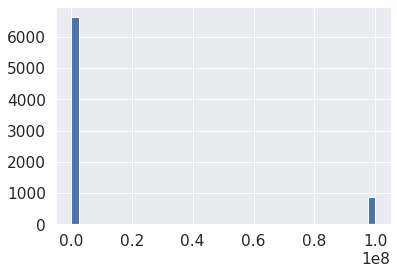

In [217]:
df_train.Current_Loan_Amount.hist(bins=40)

Правый выброс можно приравнять 870 Nan

In [218]:
df_train.loc[df_train.Current_Loan_Amount > 2000000, 'Current_Loan_Amount'] = np.nan

**Monthly_Debt**

<AxesSubplot:>

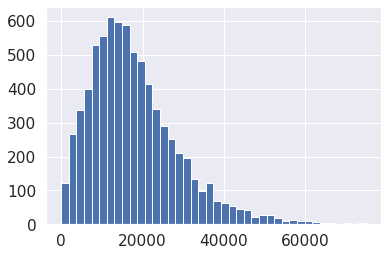

In [219]:
df_train.Monthly_Debt[df_train.Monthly_Debt < 75000].hist(bins=40)

<AxesSubplot:>

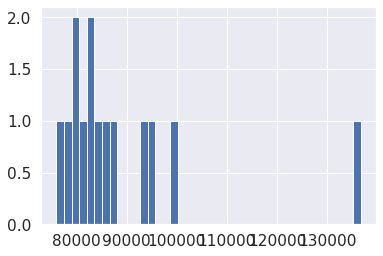

In [220]:
df_train.Monthly_Debt[df_train.Monthly_Debt > 75000].hist(bins=40)

In [221]:
df_train.Monthly_Debt[df_train.Monthly_Debt > 75000].value_counts()

85030.0     1
136679.0    1
84738.0     1
79555.0     1
75910.0     1
83458.0     1
78925.0     1
81346.0     1
94674.0     1
100091.0    1
87994.0     1
79661.0     1
83158.0     1
93640.0     1
Name: Monthly_Debt, dtype: int64

Аномалий не видно.

**Years_of_Credit_History**

<AxesSubplot:>

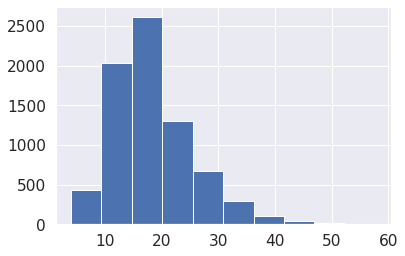

In [222]:
df_train.Years_of_Credit_History.hist()

<AxesSubplot:>

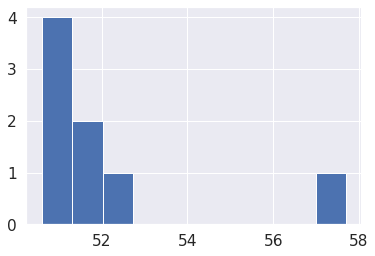

In [223]:
df_train.Years_of_Credit_History[df_train.Years_of_Credit_History > 50].hist()

Все ровно.

**Current_Credit_Balance**

<AxesSubplot:>

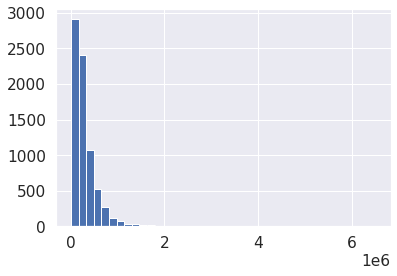

In [224]:
df_train.Current_Credit_Balance.hist(bins=40)

<AxesSubplot:>

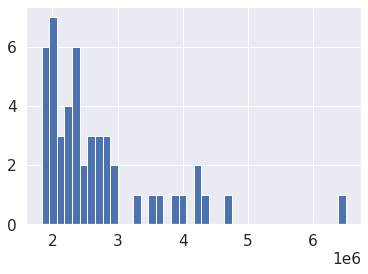

In [225]:
df_train.Current_Credit_Balance[df_train.Current_Credit_Balance > 1800000].hist(bins=40)

Аномалий нет.

**Maximum_Open_Credit**

<AxesSubplot:>

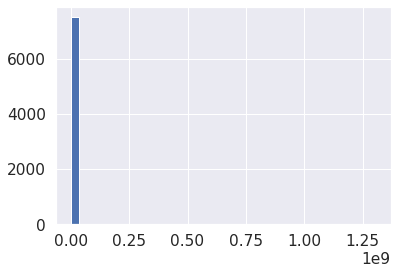

In [226]:
df_train.Maximum_Open_Credit.hist(bins=40)

<AxesSubplot:>

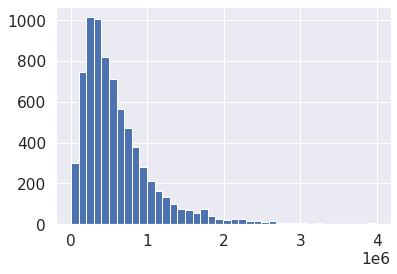

In [227]:
df_train.Maximum_Open_Credit[df_train.Maximum_Open_Credit < 4000000].hist(bins=40)

In [228]:
df_train.Maximum_Open_Credit[df_train.Maximum_Open_Credit > 3000000].value_counts()

8706038.0     1
8903180.0     1
5784482.0     1
4309294.0     1
3007136.0     1
             ..
57562560.0    1
3507042.0     1
6658762.0     1
4767444.0     1
5879808.0     1
Name: Maximum_Open_Credit, Length: 98, dtype: int64

Нормально все.

**Bankruptcies**

In [229]:
df_train.Bankruptcies.value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

Можно ограничить кол-во банкротств пятью.

In [230]:
df_train.loc[df_train.Bankruptcies > 5, 'Bankruptcies'] = 1

Здесь 0,2% Нанов. Признак почти не коррелирует с таргетом, поэтому не буду заморачиваться с длинным кодом, заменю на нули.

In [231]:
df_train.Bankruptcies = df_train.Bankruptcies.fillna(20)

In [232]:
for idx, row in df_train.iterrows():
    if row.Bankruptcies == 20:
        df_train.loc[idx, 'Bankruptcies'] = 0

**Months_since_last_delinquent**

<AxesSubplot:>

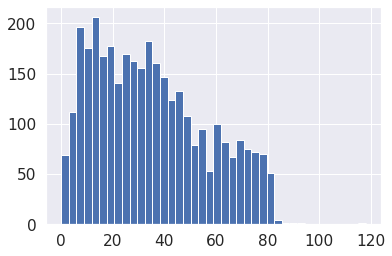

In [233]:
df_train.Months_since_last_delinquent.hist(bins=40)

In [234]:
df_train.Months_since_last_delinquent[df_train.Months_since_last_delinquent > 80].value_counts()

81.0     19
82.0      4
83.0      3
92.0      1
91.0      1
84.0      1
118.0     1
86.0      1
Name: Months_since_last_delinquent, dtype: int64

OK.